### The challenge is to train a classifier for Sign Language Recognition. A dataset from Kaggle called Sign Language Minist is used (see more details at https://www.kaggle.com/datasets/datamunge/sign-language-mnist). To help you start, we have provided the code for loading and processing the dataset.
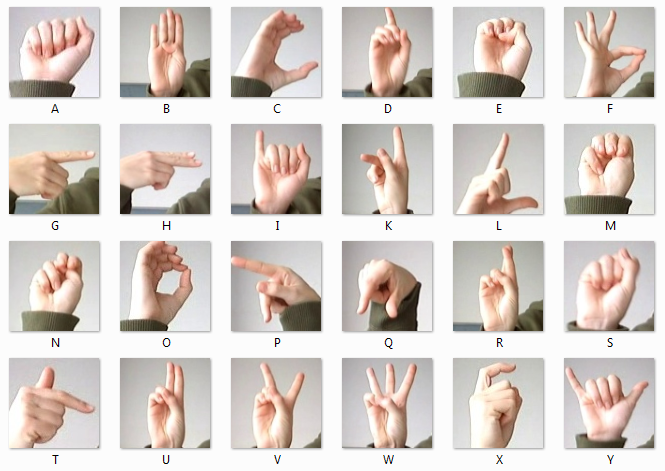

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('sign_mnist.csv')

In [3]:
data['label'] = data['label'] + 1

In [5]:
order = list(np.sort(data['label'].unique()))
print(order)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [6]:
data

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          4     107     118     127     134     139     143     146     150   
1          7     155     157     156     156     156     157     156     158   
2          3     187     188     188     187     187     186     187     188   
3          3     211     211     212     212     211     210     211     210   
4         14     164     167     170     172     176     179     180     184   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     14     189     189     190     190     192     193     193     193   
27451     24     151     154     157     158     160     161     163     164   
27452     19     174     174     174     174     174     175     175     174   
27453     18     177     181     184     185     187     189     190     191   
27454     24     179     180     180     180     182     181     182     183   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0         153  ...       207       207       207       207       206   
1         158  ...        69       149       128        87        94   
2         187  ...       202       201       200       199       198   
3         210  ...       235       234       233       231       230   
4         185  ...        92       105       105       108       133   
...       ...  ...       ...       ...       ...       ...       ...   
27450     193  ...       132       165        99        77        52   
27451     166  ...       198       198       198       198       198   
27452     173  ...       121       196       209       208       206   
27453     191  ...       119        56        27        58       102   
27454     182  ...       108       132       170       194       214   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           206       206       204       203       202  
1           163       175       103       135       149  
2           199       198       195       194       195  
3           226       225       222       229       163  
4           163       157       163       164       179  
...         ...       ...       ...       ...       ...  
27450       200       234       200       222       225  
27451       196       195       195       195       194  
27452       204       203       202       200       200  
27453        79        47        64        87        93  
27454       203       197       205       209       215  

[27455 rows x 785 columns]

In [7]:
# image number of each gesture
data.label.astype('category').value_counts().sort_index()

1     1126
2     1010
3     1144
4     1196
5      957
6     1204
7     1090
8     1013
9     1162
11    1114
12    1241
13    1055
14    1151
15    1196
16    1088
17    1279
18    1294
19    1199
20    1186
21    1161
22    1082
23    1225
24    1164
25    1118
Name: label, dtype: int64

In [8]:
# the mean value of each pixel in the training data
round(data.drop('label', axis=1).mean(), 2)

pixel1      145.42
pixel2      148.50
pixel3      151.25
pixel4      153.55
pixel5      156.21
             ...  
pixel780    162.74
pixel781    162.91
pixel782    161.97
pixel783    161.14
pixel784    159.82
Length: 784, dtype: float64

In [9]:
## Separating the X and Y variable

y = data['label']

## Dropping the variable 'label' from X variable 
X = data.drop(columns = 'label')

## Normalization
X = X/255.0

In [10]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, train_size = 0.8 ,random_state = 10)